# Part II - Ford GoBike System Data Presentation
## by Masa Masri

## Investigation Overview


In this investigation is to present the patterns and behaviors of users in a bike-sharing system. We want to understand how different factors like time of day, day of the week, user type, age, and gender affect the way people use the service. By analyzing these patterns, we can gather insights that can help improve the service,for example, create better marketing strategies.

## Dataset Overview and Executive Summary


This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area such as the duration of the trips, start and end times, station details, user type (Customer or Subscriber), and user demographics like gender and birth year.

Key Insights
1. User Types: Most users are Subscribers, meaning they use the service regularly, while Customers use it less often.
2. Trip Distance by Time of Day: Trips are generally longer around 5 PM than other times of the day, likely due to evening commutes, and longest at (5 AM to 8 AM).
3. Age and Trip Length: Younger users tend to take longer trips.
4. Gender Differences: Female typically take longer trips than Male for both customers and subscribers.
5. Peak Usage: The busiest time for trips is around 8 AM, indicating a rush during morning commutes.
6. Weekend Trends: Trips are generally longer on weekends, especially for Customers.
7. Distance Traveled: distance travelled is longer over the younger (23-40 years old) distribution and subscribers.
8. Most of the trips are less than 17 minuites long. 


In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
    # load in the dataset into a pandas dataframe
    df = pd.read_csv('data.csv')
    df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


## (Visualization 1)


How is the variation in trip distance by age group and time of day?

Facet plot to visualize how trip distance varies by age group and time of day. This plot effectively shows that younger users generally travel longer distances, particularly around 5 PM and in the early morning from 5 AM to 8 AM. By separating the data into age groups, the plot reveals that younger age groups have higher travel distances, especially during peak commuting times. This visualization provides a clear and detailed view of how different age groups use the bike-sharing system at various times of day.

In [14]:
# Calculate the distance traveled (in km) using the haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [15]:
    #calculate distance
    df['distance_km'] = haversine(df['start_station_latitude'], df['start_station_longitude'], 
                              df['end_station_latitude'], df['end_station_longitude'])

In [16]:
    df['age'] = 2019 - df['member_birth_year']

In [17]:
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['hour']= df['start_time'].dt.hour

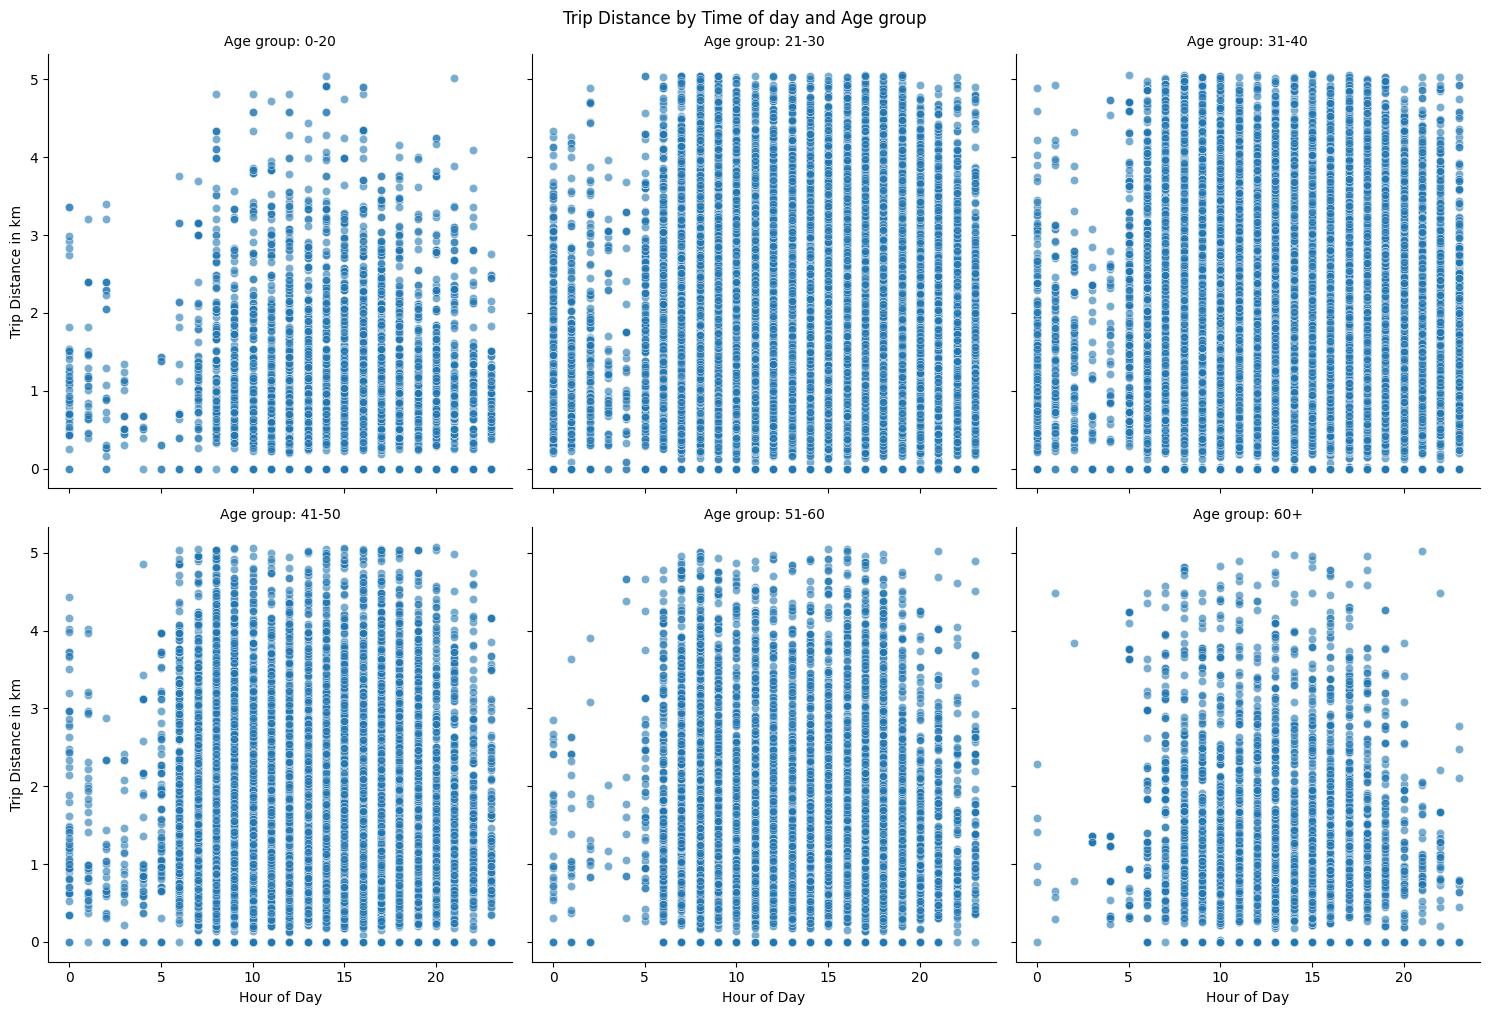

In [18]:
    #age ranges
    age_bins = [0, 20, 30, 40, 50, 60, 100]
    age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

    g = sns.FacetGrid(df.query('distance_km <= distance_km.quantile(0.99)'), col='age_group', col_wrap=3, height=5, aspect=1.0)
    g = g.map_dataframe(sns.scatterplot, 'hour', 'distance_km', alpha=0.6)
    g.set_axis_labels('Hour of Day', 'Trip Distance in km')
    g.set_titles('Age group: {col_name}')
    g.fig.suptitle('Trip Distance by Time of day and Age group', y=1.01)
    plt.show()

So, for any Bike Renting organization that would be interested in the analysis of factors affecting the way people use the service, the conclusion that younger users (specifically age groups 21-30 and 31-40 years old generally travel longer distances, especially around 5 PM , and longest at (5 AM to 8 AM) would be an important note to pay attention to, that is, to encourage the age group that takes short distance, for example to direct the suitable advertisments to their age.


## (Visualization 2)


How does the average trip duration vary across the days of week and user types?

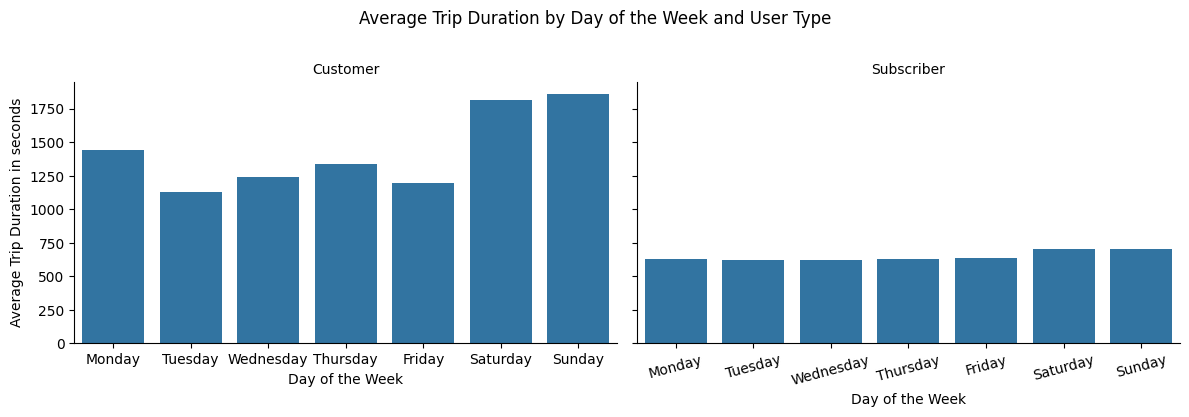

In [19]:
    #  extract day of the week
    df['day_of_week'] =df['start_time'].dt.day_name()

    # group data by day_of_week, user_type then Calculate average trip duration
    avg_duration = df.groupby(['day_of_week', 'user_type'])['duration_sec'].mean().reset_index()

    days = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday','Sunday']

    g = sns.FacetGrid(avg_duration, col="user_type", height=4, aspect=1.5)
    g.map(sns.barplot, "day_of_week", "duration_sec", order=days)
    g.set_axis_labels("Day of the Week", "Average Trip Duration in seconds")
    g.set_titles(col_template="{col_name}")
    plt.xticks(rotation= 15)
    plt.subplots_adjust(top= 0.8)
    g.fig.suptitle('Average Trip Duration by Day of the Week and User Type')
    plt.show()


To know the days of which the trips are longest in duration is is a very important information for renting organizations that has limited number of bikes, which can take strategies likemaking offers on days with lowest number of renters.  We can observe that the average trip duration vary across different days of the week, we can see that its longest on saturday and sunday.but the variationis much larger for customers than subscribers.

## (Visualization 3)

For enhacement of the bike institutions economy, we need to analyze the customers features, like their age and gender, we previously concluded that most of users are subscribers not customers, so this count plot is to visualize the distribution of customers across different age groups and gender types.

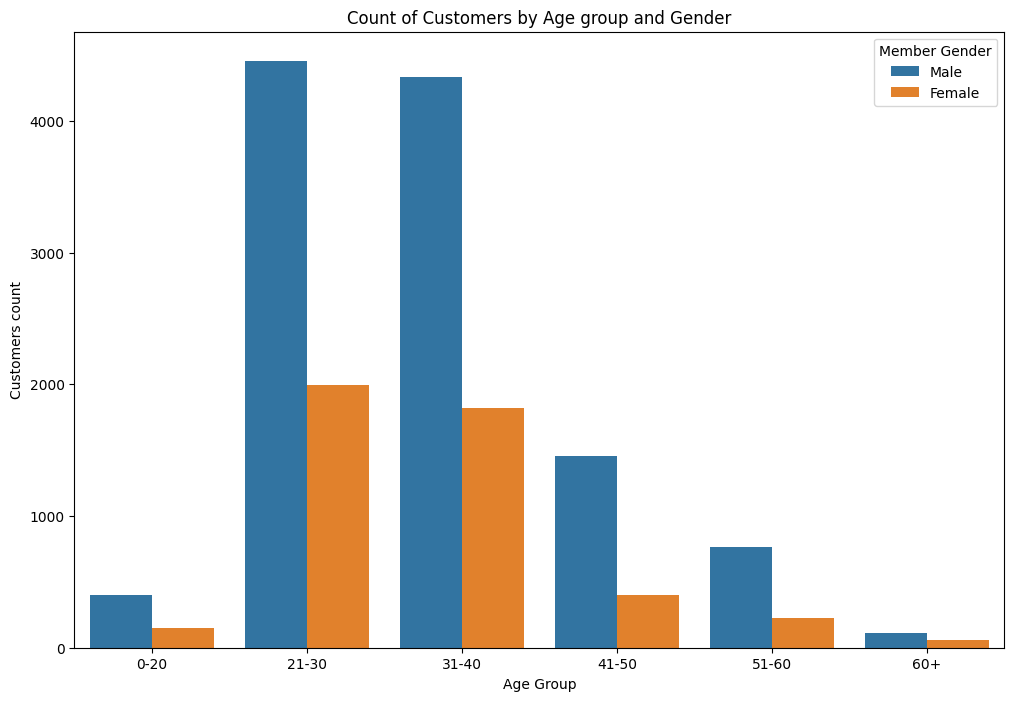

In [20]:
    df['age'] = 2019 - df['member_birth_year']

    df_filtered = df[(df['member_gender'].isin(['Male', 'Female'])) & (df['user_type'] == 'Customer')]

    age_bins = [0, 20, 30, 40, 50, 60, 100]
    age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
    df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels)


    plt.figure(figsize=[12, 8])
    sns.countplot(data=df_filtered, x='age_group', hue='member_gender')
    plt.xlabel('Age Group')
    plt.ylabel('Customers count')
    plt.title('Count of Customers by Age group and Gender')
    plt.legend(title='Member Gender')
    plt.show()

Observation: We can notice from the plot that most customers are from age ranges 31-50, and most likely Males. So that to enhance the economy, market strategies should be more focused on Female renters since they occupy the lowest percentage of the renters.

In [11]:
!jupyter nbconvert --to html Part_II_notebook.ipynb


[NbConvertApp] Converting notebook Part_II_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 1515605 bytes to Part_II_notebook.html
